# Quant basics

Bem vindo ao projetinho do Turing Quant!

Neste notebook você aprenderá os seguinte assuntos:

- Importação e visualização de dados financeiros
- Retornos e Risco de um ativo
- Análise de portfólios
- Previsão de Series Temporais

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta, date
import investpy

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

np.random.seed(0)

## 1. Importação de dataset de preço histórico

Para a importação de dados existem diversas bibliotecas em python que fornem preços históricos de ativos

Dentre elas podemos citar as seguinte plataformas:

- Google Finance (Via panda_datareader)
- Yahoo Finace (Via panda_datareader ou yfinance)
- Quandl
- Investing.com (investpy)

Pesquise sobre como importar dados nessas bibliotecas. Os datasets que conseguimos com essas bibliotecas são denominados OHLCV (open-high-low-close-volume).

- 1.1) Plote os preços de fechamento
- 1.2) Faça uma simples análise qualitativa do ativo escolhido (Ex: porque ele teve grande variação em algum momento)

In [2]:
df = investpy.stocks.get_stock_historical_data(stock = 'MGLU3', country='brazil', from_date = '01/01/2017', to_date = '01/01/2022')
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-01-02,0.40,0.40,0.39,0.39,16025600,BRL
2017-01-03,0.39,0.40,0.38,0.39,12825600,BRL
2017-01-04,0.39,0.39,0.36,0.37,27468800,BRL
2017-01-05,0.37,0.38,0.37,0.38,27622400,BRL
2017-01-06,0.38,0.38,0.37,0.38,6400000,BRL


In [3]:
investpy.get_stocks(country = 'brazil')

,country,name,full_name,isin,currency,symbol
0,brazil,ABC BRASIL PN,Banco ABC Brasil SA,BRABCBACNPR4,BRL,ABCB4
1,brazil,BRASILAGRO ON,BrasilAgro - Co ON NM,BRAGROACNOR7,BRL,AGRO3
2,brazil,RUMO ON NM,RUMO Logistica Operadora Multimodal SA,BRRAILACNOR9,BRL,RAIL3
3,brazil,ALPARGATAS ON,Alpargatas SA,BRALPAACNOR0,BRL,ALPA3
4,brazil,ALPARGATAS PN,Alpargatas SA,BRALPAACNPR7,BRL,ALPA4
...,...,...,...,...,...,...
744,brazil,Integral Brei Reit,Fdo Inv Imob Fof Integral Brei Reit,BRIBFFCTF007,BRL,IBFF11
745,brazil,Vbi Cri,Fi Imobiliario Vbi Cri,BRCVBICTF001,BRL,CVBI11
746,brazil,Hedge Realty,Hedge Realty Devl Fdo Inv Imob Etf,BRHRDFCTF000,BRL,HRDF11
747,brazil,Rb Cap,Rb Cap Desenvolvimento Res Iii Fii,BRRSPDCTF006,BRL,RSPD11


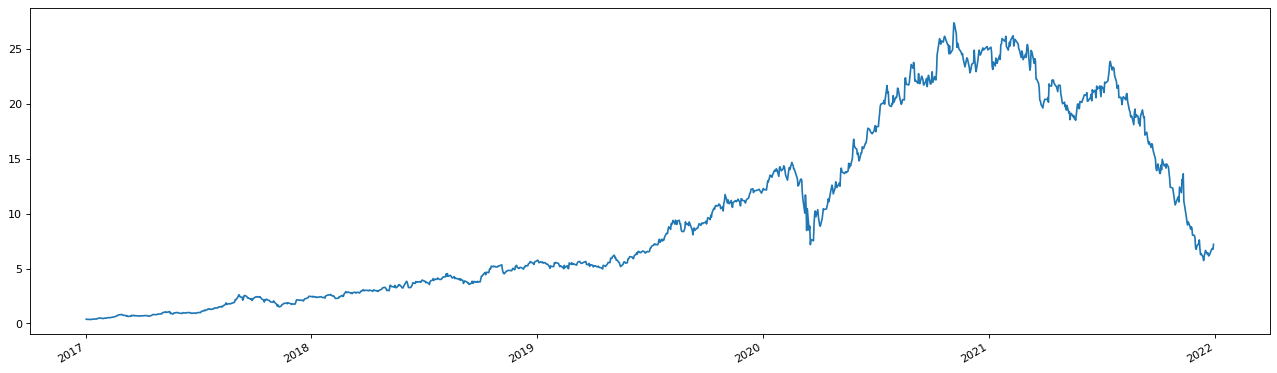

In [4]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(df['Close'])
plt.gcf().autofmt_xdate()
plt.show()

## Análise qualitativa

Em fevereiro de 2021, MGLU3 teve uma abrupta queda devido ao Covid-19, entretanto logo começou a recuperar e crescer muito até o final de 2020. No ano de 2021, MGLU3 teve, e continua tendo, uma queda muito grande. Essa queda pode ser explicada por muitos fatores, mas é dificil entender sua real causa. Algumas das possibilidades é que devido ao crescimento excessivo de magalu, suas ações ficaram muito caras comparado ao seu real valor. Além disso, existem alguns fatores que podem ter servido de gatilho para que o mercado tentasse ajustar o preço desta ação. Uma delas é a crise de semi-condutores. Como magalu tem investido muito em tecnologia, a crise de semi-condutores afeta seu processo, já que esta é uma empresa cada vez mais tecnológica. Outro fator é a desvalorização do real perante ao dolar, já que magalu é uma empresa brasileira. Além disso, em 2020 o lucro da Magazine Luiza caiu de, mais ou menos, 900 mil reais para 300 mil reais. Outros fatores muito importantes, é a taxa de juros alta e a grande inflação, já que magalu é uma empresa de varejo.

# 2. Retorno e Risco

Essencialmente, a natureza do Mercado Financeiro é baseada em um certo nível de retorno (a variação do seu investimento) para um dado nível de risco (o quão provável é esse retorno). Há uma série de maneiras para mensurar o risco, mas geralmente elas estão ligadas à volatilidade do ativo, que, em sua forma mais simples, é o desvio padrão dos preços em um dado período.

Com o mesmo ativo que você importou anteriormente, iremos iniciar os calculos de risco e retorno. Porém inicialmente iremos analisar retorno e risco com o preço de fechamento.

## Retorno

Existem algumas maneiras de se calcular o retorno de uma série temporal, aqui podemos citar duas:

- 2.1) Retorno Percentual: $R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$
- 2.2) Retorno Logaritmo: $r_t = \ln(\frac{P_t}{P{t-1}}) = \ln(P_t) - \ln(P_{t-1})$

Sendo $P_t$ o preço no tempo t, e $P_{t-1}$ preço no tempo $t-1$ (Dia anterior).

Manipulando o dataframe implemente esse dois tipos de retonos e compare-os. 

Calcule os retornos cumulativos ao longo do tempo:

- 2.3) Retorno Cumulativo Percentual: 

$R_{cum} = \prod_{t=0}^{t = \text{max dias}}{(1 + R_{t})} =  (1+R_{t-\text{max dias}}) * \dots * (1+R_{t-1}) * (1+R_t)$
- 2.4) Retorno Cumulativo Logaritmo: 

$r_{cum} = \sum_{t = 0}^{t = \text{max dias}}{(1 + r_t)} = (1+r_{t-\text{max dias}}) + \dots + (1+r_{t-1}) + (1+r_t)$

In [5]:
df['P(t-1)'] = df['Close'].shift(1)
df['Rt'] = df['Close']/df['P(t-1)'] - 1 ## Retorno Percental
df['rt'] = np.log(df['Close']/df['P(t-1)']) ## Retorno Logaritmo
df.head(10)

,Open,High,Low,Close,Volume,Currency,P(t-1),Rt,rt
Date,,,,,,,,,
2017-01-02,0.40,0.40,0.39,0.39,16025600,BRL,NaN,NaN,NaN
2017-01-03,0.39,0.40,0.38,0.39,12825600,BRL,0.39,0.000000,0.000000
2017-01-04,0.39,0.39,0.36,0.37,27468800,BRL,0.39,-0.051282,-0.052644
2017-01-05,0.37,0.38,0.37,0.38,27622400,BRL,0.37,0.027027,0.026668
2017-01-06,0.38,0.38,0.37,0.38,6400000,BRL,0.38,0.000000,0.000000
2017-01-09,0.38,0.38,0.36,0.36,29849600,BRL,0.38,-0.052632,-0.054067
2017-01-10,0.36,0.37,0.36,0.37,19968000,BRL,0.36,0.027778,0.027399
2017-01-11,0.37,0.38,0.37,0.37,28748800,BRL,0.37,0.000000,0.000000
2017-01-12,0.38,0.40,0.38,0.40,41216000,BRL,0.37,0.081081,0.077962


O retorno diário não diz muito sobre o retorno da ação em si, para isso utilizamos o retorno cumulativo. No caso, O retorno cumulativo logaritmo é mais facil de calcular por si tratar de um somátorio. Entretanto, o percentual é mais facilmente interpretável.

In [6]:
df['Rcum'] = (df['Rt'] + 1).cumprod()-1
df['rcum'] = df['rt'].cumsum()
df.tail(10)

,Open,High,Low,Close,Volume,Currency,P(t-1),Rt,rt,Rcum,rcum
Date,,,,,,,,,,,
2021-12-16,6.28,6.51,6.13,6.40,149883504,BRL,6.17,0.037277,0.036599,15.410256,2.797907
2021-12-17,6.19,6.73,6.06,6.66,146280000,BRL,6.40,0.040625,0.039821,16.076923,2.837728
2021-12-20,6.42,6.72,6.24,6.33,92822000,BRL,6.66,-0.049550,-0.050819,15.230769,2.786909
2021-12-21,6.42,6.61,6.22,6.42,112070496,BRL,6.33,0.014218,0.014118,15.461538,2.801027
2021-12-22,6.42,6.61,6.14,6.16,85327904,BRL,6.42,-0.040498,-0.041341,14.794872,2.759685
2021-12-23,6.22,6.34,5.99,6.20,97106096,BRL,6.16,0.006494,0.006473,14.897436,2.766158
2021-12-27,6.23,6.78,6.23,6.78,124279800,BRL,6.20,0.093548,0.089428,16.384615,2.855586
2021-12-28,6.79,6.96,6.64,6.83,165573904,BRL,6.78,0.007375,0.007348,16.512821,2.862933
2021-12-29,6.84,6.90,6.70,6.76,79247400,BRL,6.83,-0.010249,-0.010302,16.333333,2.852631


Outro fato interessante é que quanto mais próximo de 0, mais próximos os dois retornos ficam. ALém disso, eles são relacionaveis  já que o r = ln(R + 1), como podemos ver abaixo para o valor da data de 2021-12-08

In [7]:
print(f"{np.log(df.loc['2021-12-21','Rcum'] +1)} = {df.loc['2021-12-21','rcum']}")

2.801026657560315 = 2.8010266575603238


## Risco

Há diversos tipo de definições de risco, em finança quantitativas uma maneira bem fácil de calcular o risco é a partir da variação do ativo. Basicamente, você não quer investir num ativo que varia muito, ou seja, muito imprevisível. Uma maneira estátistica de cálcular essa volatilidade é a partir do desvio padrão.

- 2.5) Calcule o desvio padrão do ativo

Apenas o valor do desvio padrão não apresenta muita informação, então iremos calcular o rolling std. Básicamente iremos calcular o desvio padrão a cada t intervalo de tempo.

- 2.6) Calcule o rolling std

Dica: utilize o método ```pandas.rolling(window).std()``` do pandas, window é o intervalo em que você irá calcular o desvio padrão

- 2.7) Calcule o desvio padrão exponencial móvel (EWMA)

## Desafio

- 2.8) Calcule o desvio padrão estimado pelo High e Low ([Parkinson Number](https://www.ivolatility.com/help/3.html))
<img src="https://miro.medium.com/proxy/0*t4hSod9UQhA3Lsmz.png">

- 2.9) Calcule o desvio padrão estimado por High, Low, Close e Open ([Garman-Klass](https://portfolioslab.com/garman-klass))

<img src="https://miro.medium.com/max/1400/0*S6HDttTDL2p0GCC2.png">

Temos uma breve explicação desses estimadores de volatilidade em nosso Turing Talks: [Construindo uma Estratégia de Investimentos Quantitativa — Time Series Momentum](https://medium.com/turing-talks/construindo-uma-estrat%C3%A9gia-de-investimentos-quantitativa-time-series-momentum-7e60a40636bd)

In [8]:
## Desvio Padrão
df['rt'].std()

0.03714699063769781

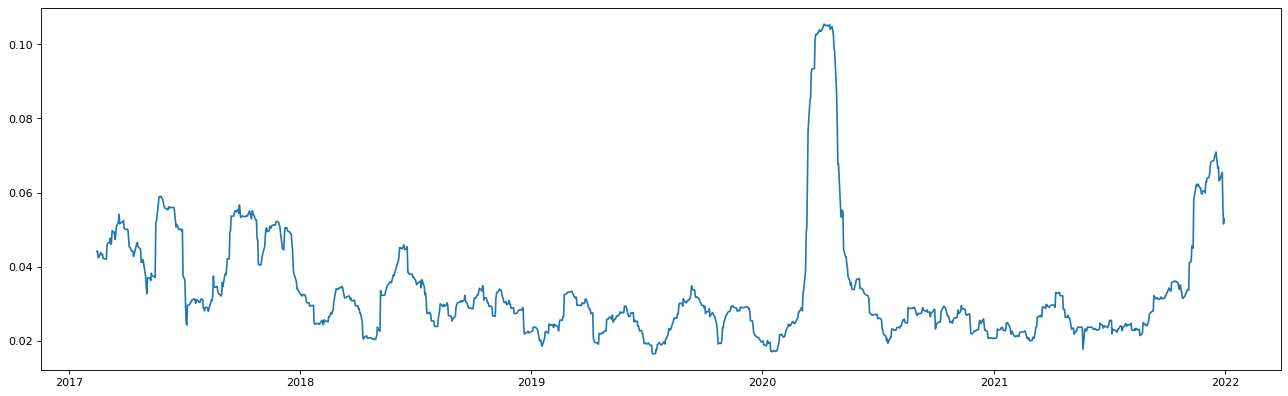

In [9]:
## rolling std
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(df['rt'].rolling(30).std())

In [10]:
## EWMA (Desvio Padrão exponencial móvel)
## https://www.investopedia.com/articles/07/ewma.asp
## http://wilsonfreitas.github.io/posts/estimando-ewma-na-pratica.html
def EWMA(ret,alpha):
    n = len(ret)
    ewma = np.zeros(n)
    sqrtret = ret**2
    ewma[1] = sqrtret[1]
    for i in range(2,n):
        ewma[i] = alpha*ewma[i-1] + (1-alpha)*sqrtret[i-1]
    return ewma

df['EWMA'] = EWMA(df['rt'],0.97)

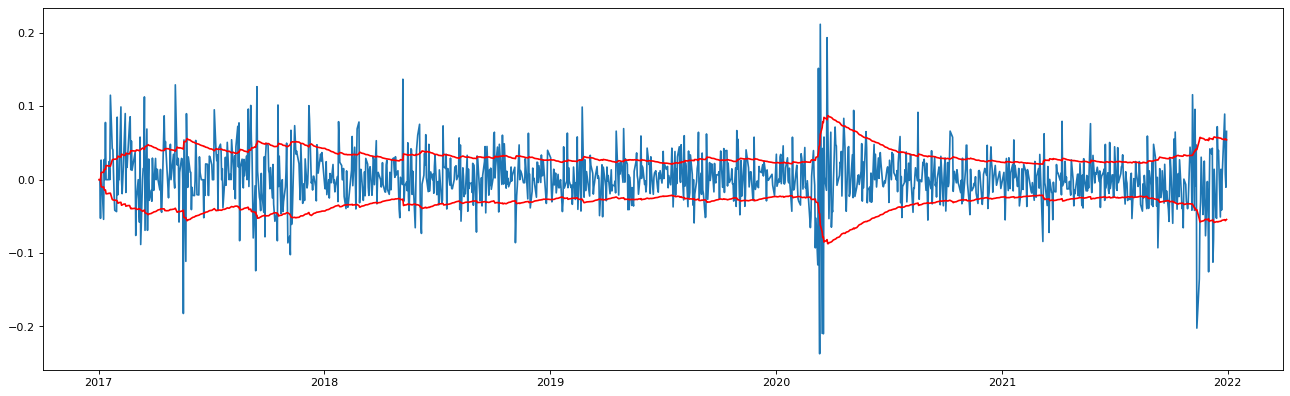

In [11]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(df['rt'])
plt.plot(np.sqrt(df['EWMA']), color = 'r')
plt.plot(-np.sqrt(df['EWMA']), color = 'r')

### Desafio

#### Número de Parkinson 

In [12]:
## Numero de Parkinson
length = len(df['High'])
logHi_Lo = np.log(df['High']/df['Low'])**2
parkinson = np.sqrt(logHi_Lo.rolling(30).sum()/(4*length*np.log(2)))

#### Garman-Klass

In [13]:
## German-Klass
Hi_Lo = (np.log(df['High']/df['Low'])**2)/2
Cl_Op = (np.log(df['Close']/df['Open'])**2)*(2*np.log(2) - 1)
aux = Hi_Lo - Cl_Op
GK = np.sqrt(aux.rolling(30).sum()/length)

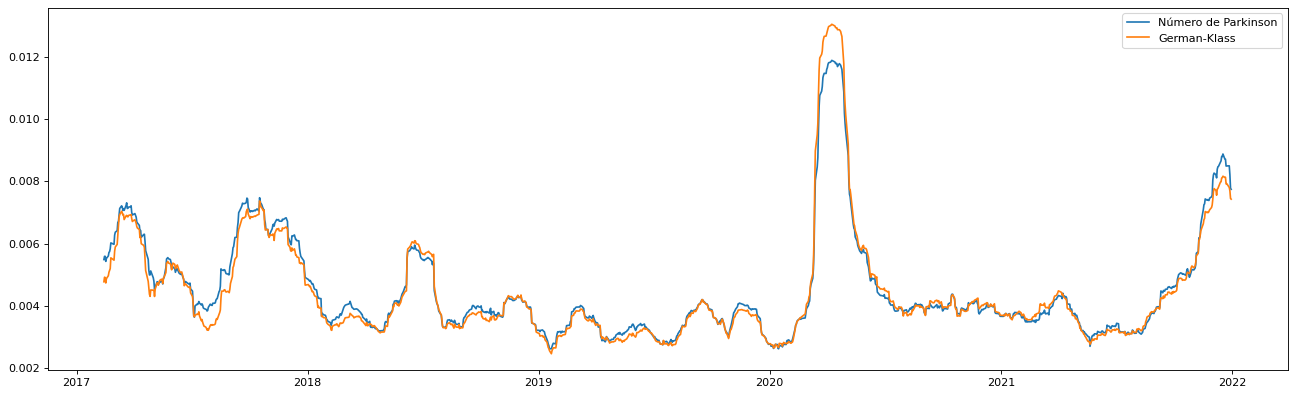

In [14]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(parkinson, label = 'Número de Parkinson')
plt.plot(GK, label = 'German-Klass')
plt.legend()

# 3. Lidando com portfolios
 
[Notebook de auxilio](https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Introduction_to_NumPy/notebook.ipynb)

Agora que você já aprendeu como importar preços históricos e como calcular o risco e retorno de ativos, podemos usar esse conhecimento para começar a montar o nosso portfolio!

Nessa etapa, você irá montar uma carteira com 4 ações diferentes. 
 - Use o que você aprendeu nas etapas anteriores para construir um dataframe com 4 ativos diferentes junto com os seus respectivos **dados históricos de fechamento**.
 
Em seguida, você precisa distribuir a porcentagem que cada ativo da sua carteira receberá dos seus investimentos. Em finanças, chamamos isso de [pesos de um portfolio](https://www.investopedia.com/terms/p/portfolio-weight.asp)
 - Atribua pesos ($w$) para cada um dos ativos que estão na sua carteira (Ele devem somar 1) . Ex: w = [0.3, 0.3, 0.2, 0.2]

## Retorno

Agora, você pode calcular o **retorno** do seu portfolio. 

O retorno para um período é dado pela seguinte fórmula: $R = \vec{r} \times \vec{w}$

Onde $\vec{r}$ é o vetor de retornos de cada ativo da carteira, e $\vec{w}$ os seus respectivos pesos.

- 3.1) Calcule o **retorno** para cada dia da série temporal

- 3.2) Faça um gráfico para visualizar os **retornos cumulativos** do seu portfolio e compare com algum benchmark (EX: IBOV). 

In [15]:
# Preço de Fechamento das ações
tickers = ['PETR3','VALE3','WEGE3','ELET3']
df = pd.DataFrame()
for t in tickers:
    df[t] = investpy.stocks.get_stock_historical_data(stock = t, country='brazil', from_date = '19/01/2017', to_date = '19/01/2022')['Close']
df.tail()

,PETR3,VALE3,WEGE3,ELET3
Date,,,,
2022-01-13,33.85,84.20,28.95,31.42
2022-01-14,34.56,84.69,30.70,31.61
2022-01-17,34.45,84.25,30.35,31.69
2022-01-18,34.57,86.31,30.54,31.70
2022-01-19,34.25,88.21,30.50,33.04


In [16]:
# Indice ibovespa
ibov = investpy.indices.get_index_historical_data(index = 'Bovespa', country='brazil', from_date = '19/01/2017', to_date = '19/01/2022')['Close']
df['ibov'] = ibov

In [17]:
weights = [0.25,0.25,0.25,0.25]
R = np.dot(df[tickers].pct_change(), weights)
dfcomp = (pd.DataFrame(R, columns = ['R'],index = ibov.index).join(df['ibov'].pct_change())+1).cumprod() - 1

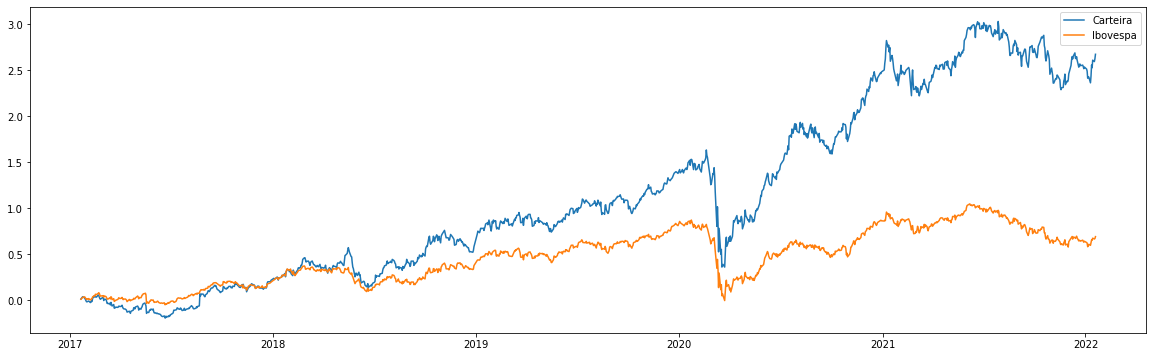

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(dfcomp)
plt.legend(['Carteira','Ibovespa'])

## Risco

Para calcular um **risco** de um portfolio precisamos levar em conta as correlações entre todos os ativos. Para isso calcularemos a matriz de covariaças $C$ (```pandas.cov()``` ou ```np.cov()```).

A equação do risco de uma portfólio é dada pela seguinte fórmula: $\sigma = \sqrt{\vec{w}C\vec{w}^\mathsf{T}}$, sendo $T$ a tranposição de um array 

- 3.3) Calcule o risco de 3 portfólios (varie o vetor de pesos).

<AxesSubplot:>

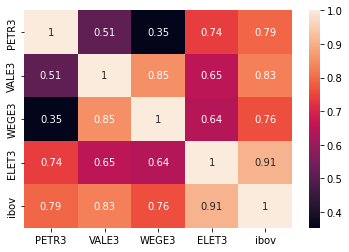

In [19]:
sns.heatmap(df.corr(), annot = True)

In [20]:
# ['PETR3','VALE3','WEGE3','ELET3']
w = np.array([0.25,0.25,0.25,0.25])
log_ret = np.log(df[tickers]/df[tickers].shift(1))
vol = np.sqrt(np.dot(w, np.dot(log_ret.cov()*252, w.T)))
print(f"A volatilidade anual é de {vol*100}% para os pesos {w}")
# Segundo Portifolio
w = np.array([0.3,0.3,0.2,0.2])
log_ret = np.log(df[tickers]/df[tickers].shift(1))
vol = np.sqrt(np.dot(w, np.dot(log_ret.cov()*252, w.T)))
print(f"A volatilidade anual é de {vol*100}% para os pesos {w}")
# Terceiro Portifolio
w = np.array([0.4,0.1,0.1,0.4])
log_ret = np.log(df[tickers]/df[tickers].shift(1))
vol = np.sqrt(np.dot(w, np.dot(log_ret.cov()*252, w.T)))
print(f"A volatilidade anual é de {vol*100}% para os pesos {w}")

A volatilidade anual é de 34.48041184366182% para os pesos [0.25 0.25 0.25 0.25]
A volatilidade anual é de 34.54173607903356% para os pesos [0.3 0.3 0.2 0.2]
A volatilidade anual é de 41.437602744280625% para os pesos [0.4 0.1 0.1 0.4]


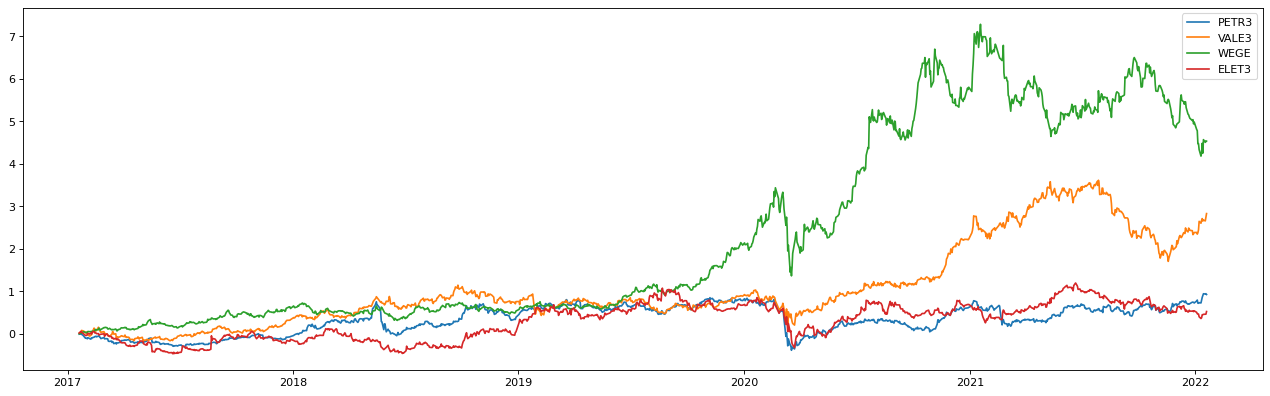

In [21]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot((np.cumprod(df[tickers].pct_change()[1:] + 1)-1))
plt.legend(['PETR3','VALE3','WEGE','ELET3'])

## Teoria Moderna de Portifolio - Markowitz 

Markowitz também conhecido como efficient frontier, é uma maneira de otimizar uma carteira de investimentos. A maneira mais simples de encontrar a melhor solução é via simulação. Portanto simula-se diversos pesos, e para cada peso é calculado seu retorno esperado e risco. 

- 3.4) Otimize a carteira e obtenha o portfolio com o melhor retorno ajustado ao risco (Sharpe Ratio)

<img src="https://miro.medium.com/max/864/1*RQrjkJQhgVLnpyo1lXbizA.png">

In [22]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df_close.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df_close.columns),)
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

In [23]:
wallets = generate_wallets(df[tickers])
w = best_portfolio(wallets)
w

array([0.01101095, 0.37243907, 0.58124932, 0.03530066])

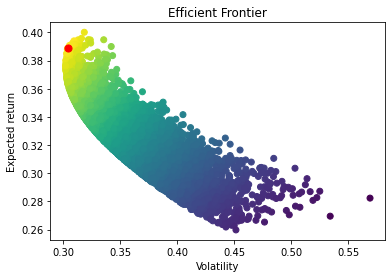

In [24]:
plot_efficient_frontier(wallets)

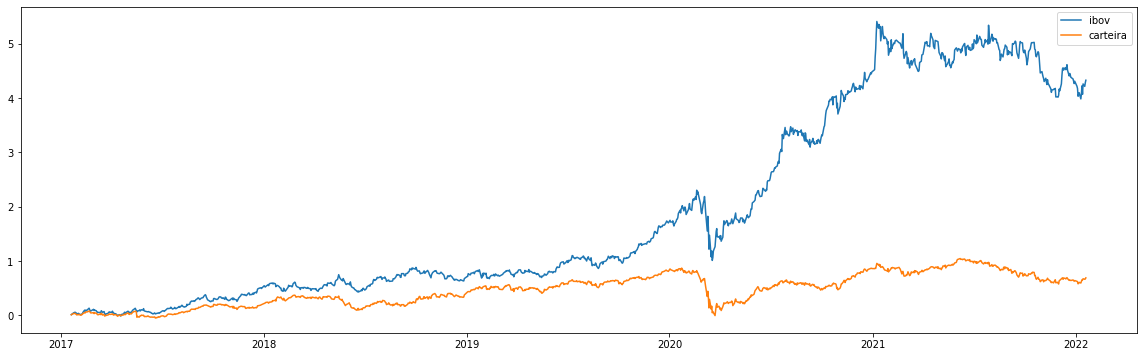

In [25]:
R = np.dot(df[tickers].pct_change(), w)
dfcomp = (pd.DataFrame(R, columns = ['R'],index = df.index).join(df['ibov'].pct_change())+1).cumprod() - 1
plt.figure(figsize=(20, 6))
plt.plot(dfcomp)
plt.legend(['ibov','carteira'])

## Backtesting

Estratégia de investimento: Rebalanceamento mensal de uma carteira de investimentos.

- 3.5.1) Maneira simplificada: Calcular retornos mensais ao longo do tempo. Obtenha os pesos otimizado para o mês e calcule o rendimento do proxímo mês.
- 3.5.2) Maneira completa: Realize o rebalanceamento mensal e calcule os retornos diários. Fique atento que ao longo do mês os pesos do ativos variam.
- 3.6) Faça uma análise quantitativa e qualitativa da performace do backtesting.

In [26]:
# Simplificada
def BacktestingSimples(data):
    returns = []
    data_mensal = data.resample('BM').pad().pct_change()
    for i in range(12,len(data_mensal.index)-1):
        df_mensal = data[data_mensal.index[i-12]:data_mensal.index[i]]
        wallets_mensal = generate_wallets(df_mensal)
        w_mensal = best_portfolio(wallets_mensal)
        returns.append(data_mensal[data_mensal.index[i+1]:data_mensal.index[i+1]].dot(w_mensal).values[0])
    returns = pd.DataFrame(returns, index = data_mensal.index[13:],columns = ['Rt'])
    return returns

In [27]:
bts = BacktestingSimples(df[tickers])
bts['Rtcum'] = (bts['Rt']+1).cumprod() - 1

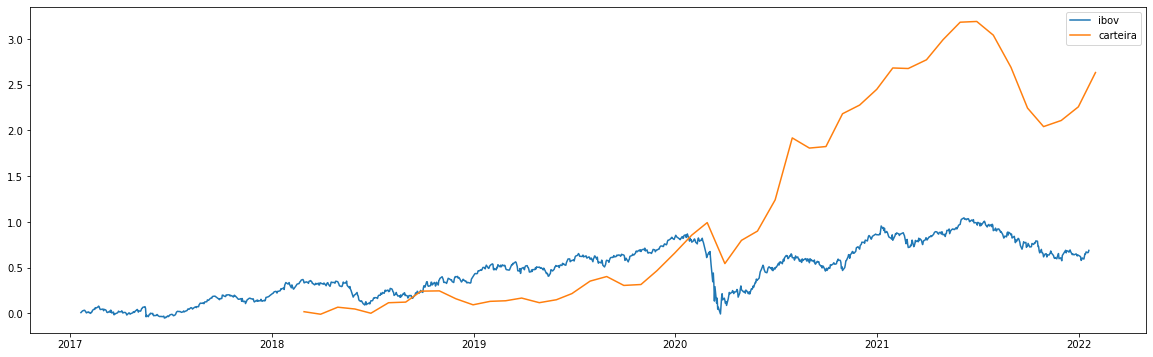

In [28]:
plt.figure(figsize=(20, 6))
plt.plot(((df['ibov'].pct_change()+1).cumprod() - 1))
plt.plot(bts['Rtcum'])
plt.legend(['ibov','carteira'])

In [29]:
# Completa
## Minha ideia é fazer pela quantidade, pq teoricamente, a quantidade de ações só muda no inicio do mês.
## Desse modo, após calcular o peso. Divide-se pelo preço das ações e essa será a quantidade proporcional, que será constante durante todo mês.
def BacktestingCompleta(data):
    returns = []
    data_mensal = data.resample('BM').pad()
    datacopy = data.copy()
    datacopy['patrimonio'] = np.nan
    patrimonio = 1
    for i in range(12,len(data_mensal.index)-1):
        df_mark = data[data_mensal.index[i-12]:data_mensal.index[i]]
        wallets_mensal = generate_wallets(df_mark)
        w_mensal = best_portfolio(wallets_mensal)
        df_mensal = data[data_mensal.index[i]:data_mensal.index[i+1]]
        quantidade = patrimonio*w_mensal/data_mensal[data_mensal.index[i]:data_mensal.index[i]].values.tolist()
        datacopy.loc[data_mensal.index[i]:data_mensal.index[i+1], 'q' + data.columns ] = quantidade
        patrimonio = 0
        for k in range(len(data.columns)):
            patrimonio += df_mensal.iloc[len(df_mensal) - 1][data.columns[k]]*quantidade[0][k]
    datacopy.fillna(method='ffill',inplace = True)
    for i in range(len(datacopy)):
        patrimonio = 0
        for k in data.columns:
            patrimonio += datacopy.iloc[i][k]*datacopy.iloc[i]['q'+k]
        datacopy.iloc[i]['patrimonio'] = patrimonio
    return datacopy

In [30]:
btc = BacktestingCompleta(df[tickers])

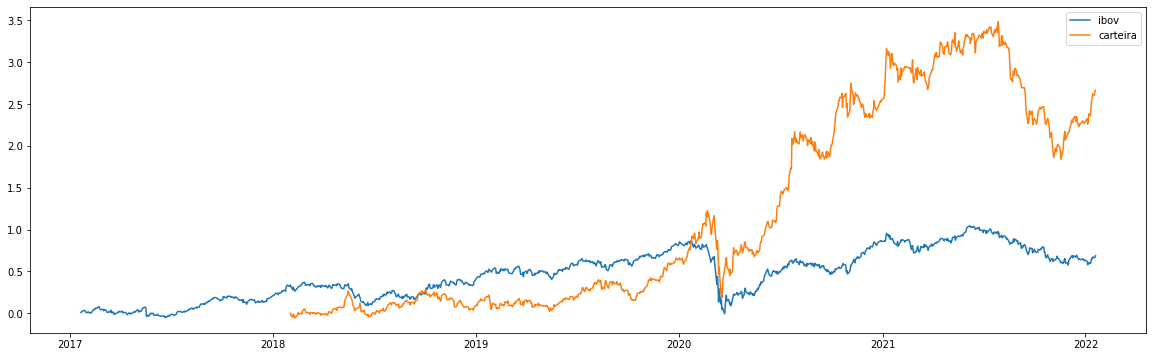

In [31]:
plt.figure(figsize=(20, 6))
plt.plot(((df['ibov'].pct_change()+1).cumprod() - 1))
plt.plot((btc['patrimonio'].pct_change()+1).cumprod() - 1)
plt.legend(['ibov','carteira'])

# 4. Previsão de Time Series

## Cross validation em Séries Temporais

Sempre que lidamos com algoritmos de machine learning, para treiná-los temos que separar os datasets em treino e em teste. Em séries temporais não podemos separar os dados aleatoriamente, pois a ordem no tempo importa! Portanto, seguimos a seguinte separação ao longo do tempo:

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>

## Feature Engineering em Série Temporal

Para inserir machine learning em séries temporais, precisamos efetuar o processo conhecido como feature engineering, que é básicamente construir as entradas de nosso modelo.

### Lags
Os dados mais simples que podemos inserir no nosso modelo são os valores passados.
Se deslocarmos (com a função `.shift(i)`) a série temporal em $i$ vezes, conseguimos estabelecer uma feature onde o valor atual no tempo $t$ é alinhado com um valor no tempo $t-i$. Chamamos isso de _lag_, ou atraso na série temporal. Isso é bastante útil, por exemplo, para estratégias baseadas em um valor histórico de uma feature.

### Demais features
Além dos pontos passados outras features podem ser inseridas no modelo: Volume de negociações, momentum, volatilidade, dados do mercado (ex: ibov) e etc.

- 4.1) Realize o feature engineering e teste alguns modelos de ML (Ex: Regressão linear, ARIMA, Decision Tree, Random Forest, Redes Neurais, etc...)
- 4.2) Faça um gráfico comparando os valores reais e preditos pelo modelo, durante um determinado período.
<br/>
Exemplo:
<br/>
<img width="500" height="500" src="https://miro.medium.com/max/1000/1*NvhZBDp5jNX-5Qd4LT7FEw.png">

In [ ]:
# Para tal, faremos apenas de VALE3.
dfVale = investpy.stocks.get_stock_historical_data(stock = 'VALE3', country='brazil', from_date = '19/01/2017', to_date = '19/01/2022')[['Close','Volume']]
dfVale.head()
# O target é o preço, então adicionaremos algumas features.
dfVale['Rt'] = dfVale['Close'].pct_change()
dfVale['Rcum'] = (dfVale['Rt'] + 1).cumprod()-1
dfVale['lag_5'] = dfVale['Close'].shift(5)
dfVale['ibov'] = investpy.indices.get_index_historical_data(index = 'Bovespa', country='brazil', from_date = '19/01/2017', to_date = '19/01/2022')['Close']
dfVale.dropna(inplace=True)
dfVale.head()

In [ ]:
lentreino = int(0.7*len(dfVale))
dfTreino = dfVale[:lentreino]
y_treino = dfTreino['Close']
X_treino = dfTreino.drop(['Close'], axis =1)
dfTeste = dfVale[lentreino:]
y_teste = dfTeste['Close']
X_teste = dfTeste.drop(['Close'], axis =1)

In [ ]:
# Regressão Linear
rl = LinearRegression(normalize=True, fit_intercept=False)
rl.fit(X_treino, y_treino)
rl_pred = rl.predict(X_teste)
print(cdrl)

In [ ]:
# SVM
SVM = SVR(C=1e3)
SVM.fit(X_treino, y_treino)
SVM_pred = SVM.predict(X_teste)

Deu errado, n sei mtt bem o motivo

In [ ]:
df = pd.DataFrame({'SVM' :SVM_pred,'rl': rl_pred}, index = y_teste.index)
plt.plot(df)
plt.plot(y_teste)
plt.legend(['SVM', 'Regressão Linear', 'Real'])

Como eu botei apenas um lag, parece

## LSTM

E por fim te desafiamos a implementar uma arquitetura de redes neurais para dados sequências: LSTM. Podem tomar como referência esse notebook, podem copiar o código, o intuito dessa etapa é que vocês tenham um contato com Deep Learning. (https://drive.google.com/file/d/1uagMXYRMJTdMJwoQbQD5LVfrYj4aUuSF/view?usp=sharing)

In [ ]:
# Escreva seu código aqui